In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from decimal import Decimal
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv("FallDataset.csv",sep=';')
TIME_COLS = [col for col in data.columns if col.startswith('Time')] # list comprehension

In [ ]:
data

,Falls,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,...,Time 272,Time 273,Time 274,Time 275,Time 276,Time 277,Time 278,Time 279,Time 280,isFall
0,1,104230,104230,106260,101860,102760,106260,106260,112670,111860,...,111860,111860,106260,101860,95040,95360,96640,108530,110490,1.0
1,2,111040,106260,110490,105110,106260,96640,99440,96640,98820,...,86290,89080,84140,81560,73700,70750,72030,70310,77340,1.0
2,3,87350,78130,70750,73700,84140,81560,84510,86290,77340,...,87350,94070,85940,93750,94070,89080,91440,87350,91110,1.0
3,4,125000,128850,115350,121530,115350,119510,118220,111860,110490,...,109650,115350,101860,101860,106260,98820,106260,116140,110490,1.0
4,5,87350,91110,97890,101860,100050,98820,95040,94070,96640,...,133500,132810,139750,138220,126210,125240,138440,139100,139750,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,324,97890,91110,91110,87350,101860,89080,84510,97890,95360,...,101560,94070,86290,95360,87350,94400,98820,89080,89080,0.0
324,325,109650,101860,97890,95040,99440,96640,98820,106260,109650,...,111040,111860,101860,98820,112670,117190,106260,101860,101860,0.0
325,326,109650,109650,101860,96640,106260,106260,94400,106260,117190,...,105110,101860,100050,94070,88390,93750,100050,101860,101860,0.0
326,327,94070,94070,87350,87350,94070,89080,80430,89080,94400,...,91440,104820,91440,91110,96640,84510,95040,91110,91110,0.0


In [ ]:
def divide_by_10e5(dataframe):
    divisor = Decimal(10**5)
    dataframe[TIME_COLS] = dataframe[TIME_COLS].div(divisor)
    return dataframe

In [ ]:
divide_by_10e5(data)
data.head()

,Falls,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,...,Time 272,Time 273,Time 274,Time 275,Time 276,Time 277,Time 278,Time 279,Time 280,isFall
0,1,1.0423,1.0423,1.0626,1.0186,1.0276,1.0626,1.0626,1.1267,1.1186,...,1.1186,1.1186,1.0626,1.0186,0.9504,0.9536,0.9664,1.0853,1.1049,1.0
1,2,1.1104,1.0626,1.1049,1.0511,1.0626,0.9664,0.9944,0.9664,0.9882,...,0.8629,0.8908,0.8414,0.8156,0.737,0.7075,0.7203,0.7031,0.7734,1.0
2,3,0.8735,0.7813,0.7075,0.737,0.8414,0.8156,0.8451,0.8629,0.7734,...,0.8735,0.9407,0.8594,0.9375,0.9407,0.8908,0.9144,0.8735,0.9111,1.0
3,4,1.25,1.2885,1.1535,1.2153,1.1535,1.1951,1.1822,1.1186,1.1049,...,1.0965,1.1535,1.0186,1.0186,1.0626,0.9882,1.0626,1.1614,1.1049,1.0
4,5,0.8735,0.9111,0.9789,1.0186,1.0005,0.9882,0.9504,0.9407,0.9664,...,1.335,1.3281,1.3975,1.3822,1.2621,1.2524,1.3844,1.391,1.3975,1.0


In [ ]:
def plot_row(dataframe, row_idx=0):
  selected_row = data.iloc[row_idx]
  time_values = [selected_row[col] for col in TIME_COLS]

  plt.plot(range(len(time_values)), time_values)

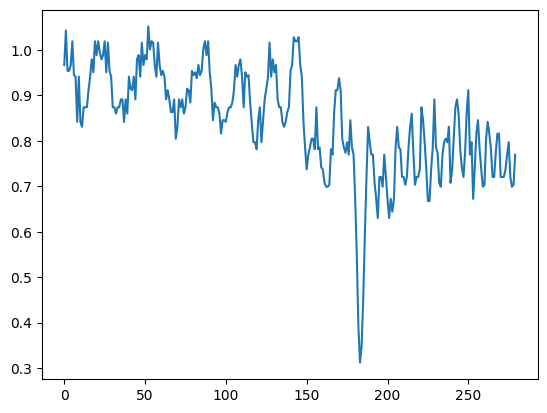

In [ ]:
plot_row(data, 5)

In [ ]:
data['isFall'].value_counts()

1.0    200
0.0    125
Name: isFall, dtype: int64

In [ ]:
data.dtypes

Falls         int64
Time 1       object
Time 2       object
Time 3       object
Time 4       object
             ...   
Time 277     object
Time 278     object
Time 279     object
Time 280     object
isFall      float64
Length: 282, dtype: object

In [ ]:
def preprocess_dtypes(dataframe):
    dataframe['isFall'] = dataframe['isFall'].astype('category')
    dataframe['Falls'] = dataframe['Falls'].astype('object')

    dataframe[TIME_COLS] = dataframe[TIME_COLS].astype(float)

    return dataframe

In [ ]:
data = preprocess_dtypes(data)
data.dtypes

Falls         object
Time 1       float64
Time 2       float64
Time 3       float64
Time 4       float64
              ...   
Time 277     float64
Time 278     float64
Time 279     float64
Time 280     float64
isFall      category
Length: 282, dtype: object

In [ ]:
print(f"Shape before dropna: {data.shape}")
null_counts = data.isnull().sum(axis=0)
print(null_counts)
nonzero_null_counts = null_counts[null_counts != 0]
print(nonzero_null_counts)

data = data.dropna()
print(f"Shape after dropna: {data.shape}")

Shape before dropna: (328, 282)
Falls       0
Time 1      0
Time 2      0
Time 3      0
Time 4      0
           ..
Time 277    0
Time 278    0
Time 279    0
Time 280    0
isFall      3
Length: 282, dtype: int64
isFall    3
dtype: int64
Shape after dropna: (325, 282)


In [ ]:
def standardize(dataframe):
    scaler = StandardScaler()
    dataframe[TIME_COLS] = scaler.fit_transform(dataframe[TIME_COLS])
    return dataframe

In [ ]:
standardized_data = standardize(data)

<ipython-input-37-436e0216f575>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[TIME_COLS] = scaler.fit_transform(dataframe[TIME_COLS])


In [ ]:
standardized_data.head()

,Falls,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,...,Time 272,Time 273,Time 274,Time 275,Time 276,Time 277,Time 278,Time 279,Time 280,isFall
0,1,-0.082629,-0.081389,-0.012296,-0.141599,-0.100780,0.000011,-0.002502,0.187641,0.137690,...,-0.050548,-0.049870,-0.179014,-0.256782,-0.431059,-0.427887,-0.396910,-0.109350,-0.076215,1.0
1,2,0.099888,-0.026450,0.099435,-0.052991,-0.006606,-0.256427,-0.188013,-0.240438,-0.222053,...,-0.645832,-0.565601,-0.692218,-0.726258,-0.918923,-0.998626,-0.965894,-0.986097,-0.842861,1.0
2,3,-0.535033,-0.787750,-0.950252,-0.909351,-0.601789,-0.658413,-0.594123,-0.516834,-0.814635,...,-0.621155,-0.452629,-0.650457,-0.444341,-0.453234,-0.573528,-0.517134,-0.595208,-0.524408,1.0
3,4,0.474033,0.584918,0.227806,0.394683,0.237979,0.353215,0.322821,0.166010,0.099895,...,-0.101998,0.029142,-0.281098,-0.256782,-0.174553,-0.347644,-0.174496,0.065219,-0.076215,1.0
4,5,-0.535033,-0.436464,-0.233380,-0.141599,-0.173698,-0.198315,-0.307697,-0.309070,-0.282194,...,0.453243,0.424430,0.597985,0.584111,0.281534,0.265072,0.569507,0.591910,0.600469,1.0


In [ ]:
def create_and_evaluate_models(dataframe, log_file_path):
    # Split the data into training and testing sets
    X = dataframe[TIME_COLS]
    y = dataframe['isFall']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

    # Define the models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC()
    }

    # Define the hyperparameter grids for each model
    param_grids = {
        'Logistic Regression': {'C': [0.1, 1, 10]},
        'Decision Tree': {'max_depth': [None, 5, 10]},
        'Random Forest': {'n_estimators': [50, 100, 200]},
        'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }

    # Evaluate each model using cross-validation and hyperparameter search
    results = {}
    best_accuracy = 0.0
    best_model = None
    best_params = None

    for model_name, model in models.items():
        param_grid = param_grids[model_name]
        search = GridSearchCV(model, param_grid, scoring='precision', cv=5)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            search.fit(X_train, y_train)
        y_pred = search.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        results[model_name] = {'best_model': search.best_estimator_, 'accuracy': accuracy, 'classification_report': report, 'confusion_matrix': conf_matrix}

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = search.best_estimator_
            best_params = search.best_params_

    # Write model performances to a log file
    with open(log_file_path, 'w') as log_file:
        log_file.write(f"Best Model: {best_model}\n")
        log_file.write(f"Best Parameters: {best_params}\n\n")
        for model_name, result in results.items():
            log_file.write(f"Model: {model_name}\n")
            log_file.write(f"Accuracy: {result['accuracy']}\n")
            log_file.write(f"Classification Report:\n{result['classification_report']}\n\n")

            log_file.write(f"Confusion Matrix:\n")
            log_file.write(f"                  Predicted NO     Predicted YES\n")
            log_file.write(f"Actual NO         {result['confusion_matrix'][0, 0]:<10}     {result['confusion_matrix'][0, 1]:<10}\n")
            log_file.write(f"Actual YES        {result['confusion_matrix'][1, 0]:<10}     {result['confusion_matrix'][1, 1]:<10}\n\n")

            # Calculate TP, FP, TN, FN
            TP = result['confusion_matrix'][1, 1]
            FP = result['confusion_matrix'][0, 1]
            TN = result['confusion_matrix'][0, 0]
            FN = result['confusion_matrix'][1, 0]

            log_file.write(f"True Positives: {TP}\n")
            log_file.write(f"False Positives: {FP}\n")
            log_file.write(f"True Negatives: {TN}\n")
            log_file.write(f"False Negatives: {FN}\n\n")

            log_file.write("---------------------------------\n")

    # Return the best model and its best parameters
    return best_model, best_params

In [ ]:
log_file_path = 'model_performance.log'
best_model, best_params = create_and_evaluate_models(data, log_file_path)

In [ ]:
new_X = data[TIME_COLS].iloc[[-1]]
new_X

,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,Time 10,...,Time 271,Time 272,Time 273,Time 274,Time 275,Time 276,Time 277,Time 278,Time 279,Time 280
327,-0.611148,-0.566911,-0.776185,-0.98978,-0.985482,-1.053201,-0.87674,-0.673324,-0.750356,-0.751904,...,-1.021911,-0.854193,-0.90429,-1.013087,-1.122653,-0.918923,-0.930212,-0.789257,-0.946641,-0.965663


In [ ]:
def predict_pipeline(original_dataframe, dataframe, best_model):
    # Select the time columns for prediction
    X_org = original_dataframe[TIME_COLS]
    X = dataframe[TIME_COLS]

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the features using the scaler
    scaler.fit(X_org)
    X_scaled = scaler.transform(X)

    # Make predictions using the best model
    predictions = best_model.predict(X_scaled)

    return predictions


In [ ]:
print(predict_pipeline(data, data.iloc[[0]], best_model))


[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
